# Part 1
## Create a new Jupyter notebook called 'SEDS-HW2.ipynb' and finish the in class excersize of creating a block of code to download the HCEPDB data, unzip it and load it into a data frame in Python (not using %% bash magic!) so that it works for a single file.

In [15]:
#List of imports for the code
import pandas as pd
import os
import requests
import zipfile
import seaborn as sns

In [3]:
#First, we will check if the file exists to avoid downloading twice

if os.path.exists('HCEPDB_moldata.zip'):
    print('File already exists')
else:
    print('Continue with download')

    #Now we will use the requests package to obtain the file from a URL

    url = 'http://faculty.washington.edu/dacb/HCEPDB_moldata.zip'
    req = requests.get(url)
    assert req.status_code == 200 #This line of code will return an error if for some reason the download is unsuccessful
    with open('HCEPDB_moldata.zip', 'wb') as f:
        f.write(req.content)
    
#Finally, we can use this command to read zip files directly in pandas

data = pd.read_csv('HCEPDB_moldata.zip', compression = 'zip')

File already exists


 I did not have the file in this particular directory, so the code continued with the download process and unzipped the file. Below is the data now being read in pandas.

In [4]:
data.head()

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
0,655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1
1,1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...
2,21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368,C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1cc...
3,65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...
4,720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1


# Part 2

## Run the code you put together for the three files below.  Use Markdown between the set of cells to offset and explain your work.

The code that was run above is fully functional for a single file. We would like to utilize the code to now open these three new files below.

| URL | filename | csv_filename |
|-----|----------|--------------|
| http://faculty.washington.edu/dacb/HCEPDB_moldata_set1.zip | HCEPDB_moldata_set1.zip | HCEPDB_moldata_set1.csv |
| http://faculty.washington.edu/dacb/HCEPDB_moldata_set2.zip | HCEPDB_moldata_set2.zip | HCEPDB_moldata_set2.csv |
| http://faculty.washington.edu/dacb/HCEPDB_moldata_set3.zip | HCEPDB_moldata_set3.zip | HCEPDB_moldata_set3.csv |

Without requiring much more effort, it is possible to replicate the above code three times to download the three files individually by changing the filenames and URL.

#### For Set 1

In [5]:
if os.path.exists('HCEPDB_moldata_set1.zip'):
    print('File already exists')
else:
    print('Continue with download')

    url = 'http://faculty.washington.edu/dacb/HCEPDB_moldata_set1.zip'
    req = requests.get(url)
    assert req.status_code == 200 
    with open('HCEPDB_moldata_set1.zip', 'wb') as f:
        f.write(req.content)
    
df1 = pd.read_csv('HCEPDB_moldata_set1.zip', compression = 'zip')

df1.head()

File already exists


,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
0,655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1
1,1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...
2,65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...
3,720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1
4,1310744,C1C=CC=C1c1cc2[se]c3c(c4nsnc4c4ccncc34)c2c2ccc...,C24H13N3SSe,454.4137,5.605135,0.951911,90.622776,-5.551911,2.029717,-3.522194,C1=CC=C(C1)c1cc2[se]c3c(c4nsnc4c4ccncc34)c2c2c...


#### For Set 2

In [6]:
if os.path.exists('HCEPDB_moldata_set2.zip'):
    print('File already exists')
else:
    print('Continue with download')

    url = 'http://faculty.washington.edu/dacb/HCEPDB_moldata_set2.zip'
    req = requests.get(url)
    assert req.status_code == 200 
    with open('HCEPDB_moldata_set2.zip', 'wb') as f:
        f.write(req.content)
    
df2 = pd.read_csv('HCEPDB_moldata_set2.zip', compression = 'zip')

df2.head()

File already exists


,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
0,21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0,0,197.474780,-4.539526,1.462158,-3.077368,C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1cc...
1,2752585,C1C=CC=C1C1=Cc2c(C1)c1c(c3c[nH]cc23)c2c3c[nH]c...,C28H20N2Si,412.5660,0,0,198.749914,-4.499447,1.457208,-3.042239,C1=CC=C(C1)C1=Cc2c(C1)c1c(c3c[nH]cc23)c2c3c[nH...
2,524469,C1C=CC=C1C1=Cc2c(C1)c1c3c[nH]cc3c3ccsc3c1c1c[n...,C24H16N2S,364.4704,0,0,140.537136,-4.410023,1.733767,-2.676256,C1=CC=C(C1)C1=Cc2c(C1)c1c3c[nH]cc3c3ccsc3c1c1c...
3,1507746,C1C=CC=C1C1=Cc2c(C1)c1oc3C=CCc3c1c1c[nH]cc21,C21H15NO,297.3555,0,0,136.173774,-4.346269,1.754241,-2.592029,C1=CC=C(C1)C1=Cc2c(C1)c1oc3C=CCc3c1c1c[nH]cc21
4,164274,C1C=CC=C1C1=Cc2c(C1)c1[SiH2]C=Cc1c1c[nH]cc21,C18H15NSi,273.4095,0,0,137.144048,-4.567453,1.749999,-2.817455,C1=CC=C(C1)C1=Cc2c(C1)c1[SiH2]C=Cc1c1c[nH]cc21


#### For Set 3

In [7]:
if os.path.exists('HCEPDB_moldata_set3.zip'):
    print('File already exists')
else:
    print('Continue with download')

    url = 'http://faculty.washington.edu/dacb/HCEPDB_moldata_set3.zip'
    req = requests.get(url)
    assert req.status_code == 200 
    with open('HCEPDB_moldata_set3.zip', 'wb') as f:
        f.write(req.content)
    
df3 = pd.read_csv('HCEPDB_moldata_set3.zip', compression = 'zip')

df3.head()

File already exists


,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
0,927662,C1C(=Cc2cnc3c4sccc4c4nsnc4c3c12)c1scc2ccoc12,C20H9N3OS3,403.5091,4.279665,0.787542,83.634150,-5.387542,2.082774,-3.304768,c1cc2c3nsnc3c3c4CC(=Cc4cnc3c2s1)c1scc2ccoc12
1,665520,C1C=Cc2c1csc2-c1cc2ccc3c4[se]ccc4c4nsnc4c3c2cn1,C22H11N3S2Se,460.4419,5.845911,0.891818,100.884304,-5.491818,1.960913,-3.530905,c1cc2c3nsnc3c3c(ccc4cc(ncc34)-c3scc4CC=Cc34)c2...
2,2402229,c1[nH]cc2c1ccc1c3nsnc3c3c(oc4cc(-c5nccc6nsnc56...,C25H10N6O2S2,490.5260,8.873984,0.563516,242.359361,-5.163516,1.256386,-3.907130,c1cc2c3nsnc3c3c(oc4cc(-c5nccc6nsnc56)c5cocc5c3...
3,42936,[SiH2]1C(=Cc2cnc3c4occc4c4nsnc4c3c12)c1ncncn1,C16H8N6OSSi,360.4322,5.051803,1.565185,49.673911,-6.165185,2.389070,-3.776114,c1cc2c3nsnc3c3c4[SiH2]C(=Cc4cnc3c2o1)c1ncncn1
4,1910714,[SiH2]1C(=Cc2c1c1c3nsnc3c3cc[se]c3c1c1c[nH]cc2...,C21H10N6S2SeSi,517.5300,9.127722,0.651534,215.611879,-5.251534,1.394143,-3.857392,c1cc2c3nsnc3c3c4[SiH2]C(=Cc4c4c[nH]cc4c3c2[se]...


# Part 3

## In a separate set of cells, use lists, tuples, dictionaries, for loops, if statements, and whatever other tasty Python bits you want to run your code on the three files so that you don't replicate code.

As mentioned, the code in part one only works for a single indivdual file. In part two we essentially copied the code three times and modified the filenames to download the three new files seperately. While functional, this is not the most efficient and savy technique available. Imagine needing to download 10 or 20 files and having to copy/paste and modify the url's for each one. Now in this part, we will modify the code developed in part one to download all three files without needing to replicate the code each time.

First,  we will create a set of lists that contain the zip filenames and urls for each file set.


In [8]:
#List of zip files
zip_list = ['HCEPDB_moldata_set1.zip','HCEPDB_moldata_set2.zip','HCEPDB_moldata_set3.zip']

#list of URLs
url_list = ['http://faculty.washington.edu/dacb/HCEPDB_moldata_set1.zip',
        'http://faculty.washington.edu/dacb/HCEPDB_moldata_set2.zip',
        'http://faculty.washington.edu/dacb/HCEPDB_moldata_set3.zip']

Now we will add a for loop into the first part of the code that checks whether or not the file exists

In [9]:
for files in zip_list:
    if os.path.exists(files):
        print('File already exists')
    else:
        print('Continue with download')

File already exists
File already exists
File already exists


As stated, the files already exist from what we did in Part 2. The rest of the code will assume a case where we indeed did not download the files previously. This would continue directly below the last line of code above in cell 22

In [10]:
#For loop to download all the files given the list of urls. The `zip` fucntion is very convenient that it allows us to
#loop over multiple lists at once
for urls, zips in zip(url_list, zip_list):
    req = requests.get(urls)
    assert req.status_code == 200 
    with open(zips, 'wb') as f:
        f.write(req.content)
        
#For loop to open and read the zip files directly using pandas
for new_files in zip_list:
    HCEDB_sets = pd.read_csv(new_files, compression = 'zip')

HCEDB_sets.head()

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
0,927662,C1C(=Cc2cnc3c4sccc4c4nsnc4c3c12)c1scc2ccoc12,C20H9N3OS3,403.5091,4.279665,0.787542,83.634150,-5.387542,2.082774,-3.304768,c1cc2c3nsnc3c3c4CC(=Cc4cnc3c2s1)c1scc2ccoc12
1,665520,C1C=Cc2c1csc2-c1cc2ccc3c4[se]ccc4c4nsnc4c3c2cn1,C22H11N3S2Se,460.4419,5.845911,0.891818,100.884304,-5.491818,1.960913,-3.530905,c1cc2c3nsnc3c3c(ccc4cc(ncc34)-c3scc4CC=Cc34)c2...
2,2402229,c1[nH]cc2c1ccc1c3nsnc3c3c(oc4cc(-c5nccc6nsnc56...,C25H10N6O2S2,490.5260,8.873984,0.563516,242.359361,-5.163516,1.256386,-3.907130,c1cc2c3nsnc3c3c(oc4cc(-c5nccc6nsnc56)c5cocc5c3...
3,42936,[SiH2]1C(=Cc2cnc3c4occc4c4nsnc4c3c12)c1ncncn1,C16H8N6OSSi,360.4322,5.051803,1.565185,49.673911,-6.165185,2.389070,-3.776114,c1cc2c3nsnc3c3c4[SiH2]C(=Cc4cnc3c2o1)c1ncncn1
4,1910714,[SiH2]1C(=Cc2c1c1c3nsnc3c3cc[se]c3c1c1c[nH]cc2...,C21H10N6S2SeSi,517.5300,9.127722,0.651534,215.611879,-5.251534,1.394143,-3.857392,c1cc2c3nsnc3c3c4[SiH2]C(=Cc4c4c[nH]cc4c3c2[se]...


# Part 4

## Use the Markdown in the notebook to describe how using these features of Python made your code shorter, more easy to read, and easier to maintain.

While I think I annotated my steps in the code pretty well, I first created a list of the zip files and urls. I then incorporated these lists into a for loop to check if the list of files already existed, and if not, the code continues to download all three files. I was having some trouble with the section of code that specifically downloads the file, and incorporating both lists into the code. I was told about a nifty zip fucntion that, simialr to files on a computer, can zip multiple lists together. I incorporated this into the for loop to download the file, and it worked like a charm. I am a big fan of the zip fucntion now. Finally, I created one last for loop to read all the files directly from pandas. When put all together, this new code isn't much longer than the initial code that only worked for one file. Copying and pasting code for each fileset is not necessary for this new code, and additionally maintenence is much easier and can really be modified to however many files you wish to download.

# Part 5

## Use visualizations or other tools to identify what is different between the three data sets?

I am opting to use the .describe command to see a quick summary of each dataset

In [11]:
df1.describe()

,id,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha
count,1.106498e+06,1.106498e+06,1.106498e+06,1.106498e+06,1.106498e+06,1.106498e+06,1.106498e+06,1.106498e+06
mean,1.208288e+06,3.995769e+02,3.670731e+00,5.171753e-01,1.222160e+02,-5.117175e+00,1.904693e+00,-3.212482e+00
std,8.126608e+05,5.868785e+01,2.337513e+00,2.707951e-01,6.559076e+01,2.707951e-01,4.035945e-01,3.841084e-01
min,7.000000e+00,1.682378e+02,3.604066e-05,1.236100e-05,5.129359e-01,-6.695959e+00,7.448349e-01,-3.999994e+00
25%,5.479355e+05,3.584480e+02,1.860519e+00,3.177876e-01,6.967192e+01,-5.292169e+00,1.606785e+00,-3.512764e+00
50%,1.095274e+06,3.995153e+02,3.100304e+00,4.953169e-01,1.114687e+02,-5.095317e+00,1.894533e+00,-3.206734e+00
75%,1.645769e+06,4.433908e+02,5.148094e+00,6.921690e-01,1.641510e+02,-4.917788e+00,2.194588e+00,-2.921657e+00
max,3.102846e+06,6.375008e+02,1.112053e+01,2.095959e+00,3.771846e+02,-4.600012e+00,3.803964e+00,-1.148421e+00


In [12]:
df2.describe()

,id,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha
count,1.098540e+05,109854.000000,109854.0,109854.0,109854.000000,109854.000000,109854.000000,109854.000000
mean,1.394458e+06,426.617971,0.0,0.0,70.156833,-5.061059,1.551463,-3.509596
std,8.741754e+05,63.530407,0.0,0.0,88.828024,0.542847,0.318191,0.671852
min,2.100000e+01,170.214000,0.0,0.0,0.000000,-7.512315,-0.002940,-6.086537
25%,6.496908e+05,380.479200,0.0,0.0,0.000000,-5.514987,1.313818,-4.065948
50%,1.307578e+06,425.570900,0.0,0.0,0.000000,-5.185462,1.515183,-4.008750
75%,2.108075e+06,474.552700,0.0,0.0,140.062566,-4.539314,1.762868,-2.870962
max,3.102810e+06,636.401100,0.0,0.0,397.038257,-3.632374,3.361447,-1.173109


In [14]:
df3.describe()

,id,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha
count,1.106497e+06,1.106497e+06,1.106497e+06,1.106497e+06,1.106497e+06,1.106497e+06,1.106497e+06,1.106497e+06
mean,1.442780e+06,4.304538e+02,4.568132e+00,6.418354e-01,1.237180e+02,-5.241835e+00,1.890471e+00,-3.351364e+00
std,8.817543e+05,5.644533e+01,2.393552e+00,2.843694e-01,6.331331e+01,2.843694e-01,3.898511e-01,3.358991e-01
min,1.000000e+00,1.721822e+02,1.631420e-06,2.056039e-07,1.124616e+00,-6.778957e+00,6.650433e-01,-4.000000e+00
25%,6.876230e+05,3.964888e+02,2.671723e+00,4.413994e-01,7.457651e+01,-5.421049e+00,1.610790e+00,-3.617982e+00
50%,1.376160e+06,4.326268e+02,4.046804e+00,6.204899e-01,1.147000e+02,-5.220490e+00,1.873049e+00,-3.340769e+00
75%,2.187164e+06,4.655839e+02,6.222132e+00,8.210489e-01,1.632060e+02,-5.041399e+00,2.155169e+00,-3.088315e+00
max,3.102853e+06,6.863590e+02,1.113013e+01,2.178957e+00,3.970380e+02,-4.600000e+00,3.709872e+00,-2.094457e+00


Right off the bat, the second dataset seems to be smaller than the first and third. Also, the second data set only contains molecules that have a value of zero for both the power conversion efficiency and the open circuit voltage. I Believe the second data set might be the same that I explored in HW1. I specifically wanted to see what may cause a moelcule to have values of zero for the pce and voc, so I sorted and filtered by only those molecules. This is most likely a data set of all the molecules that will not work in a solar cell. Knowing why molecules won't work in a soalr cell could be just as important than finding out why others do. 

I will do a quick distribution plot in seaborn to see any differences between data sets 1 and 3.

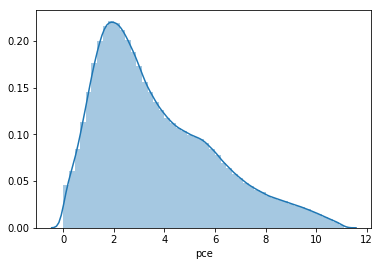

In [17]:
sns.distplot(df1['pce'])

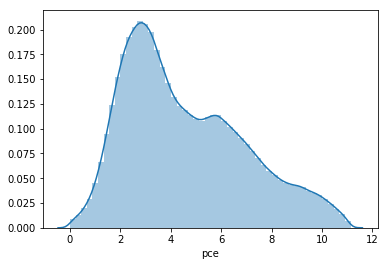

In [18]:
sns.distplot(df3['pce'])

While they seem to be pretty similar, data set 1 is a tad bit skewed more negatively than data set 3. An additional feature is noticed in both data sets around a pce value of 6, however this feature is more prominent in data set 3. 